## 神经网络结构介绍
x数据集为(200,1)，200个案例，1个feature;    
y为(200, 1)， 200个对应的输出。  

搭建的网络总共有三层。   
第一层是input_layer；  
第二层是hidden_layer；  
第三层是output_layer；  
 
激活函数都是使用的tf.nn.tanh，双曲正切函数。 

第一层有一个神经元，因为x数据集的feature只有1个；   
第二层隐层自我设定为10个神经元，所以对应的W的形状为1x10，bias的形状也是1x10；     
第三层是输出层，有一个神经元，所以对应的W的形状为10x1，bias的形状为1x1。  


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 使用numpy生成200个随机点作为样本
# np.linspace(start, stop, num_size) 生成200个点，在区间[-0.5,0.5]之间，并且等间距的向量
# [:, np.newaxis] 将生成的一维向量，变成了二维的矩阵，维度shape为200*1
# np.newaxis 为 numpy.ndarray（多维数组）增加一个轴
x_data = np.linspace(-0.5, 0.5, 200) [:, np.newaxis]

# 生成干扰项 normal(loc=0.0, scale=1.0, size=None) 符合正态分布（高斯分布）
# loc 概率分布的均值
# scale 概率分布的标准差
noise = np.random.normal(0, 0.02, x_data.shape)

y_data = np.square(x_data) + noise

In [3]:
# 定义两个placeholder占位符
# 类型为tf.float32，shape为[任意多行，1列]
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# placeholder的定义，是根据准备填充进来的数据的类型和形状定义的

下面开始定义神经网络    
input Layer  x  shape: (1,)   

L1:    
Weights_L1   1x10     
biases_L1    1x10     
Wx_plus_b_L1    1 x (1x10)  + (1 x 10)     



In [4]:
# 定义神经网络中间层
# Weights_L1的形状是1x10
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
# 激活函数使用tanh 双曲正切[-1,1]
L1 = tf.nn.tanh(Wx_plus_b_L1)

In [5]:
# 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2

prediction = tf.nn.tanh(Wx_plus_b_L2)

In [6]:
# 二次代价函数
# MSE: (真实值-预测值)的平方和 求平均
loss = tf.reduce_mean(tf.square(y - prediction))

In [7]:
# 使用梯度下降法
optimizer = tf.train.GradientDescentOptimizer(0.1)
# 目标：最小化loss
train = optimizer.minimize(loss)

0.00041435828


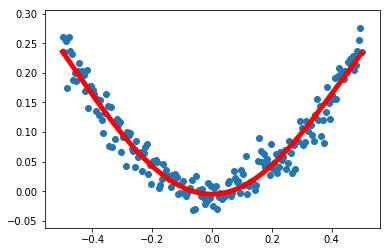

In [12]:
with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    
    # 开始迭代
    for _ in range(20001):
        sess.run(train, feed_dict={x:x_data, y: y_data})
        
    print(sess.run(loss, feed_dict={x: x_data, y: y_data, }))
    
    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict={x: x_data})
    # 用画图的方式查看预测的结果
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5) # 'r'代表线条色是红色,'-'表示线条类型, 线宽为5